<a href="https://colab.research.google.com/github/JoaoPedro8807/computer_vision/blob/main/redes_neuras_classificacao_img_sem_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXTRAÇÃO DOS DADOS DE IMAGENS PARA ENVIAR PARA REDES NEURAIS (SEM CNN POR ENQUANTO APENAS OS VETORES)**

In [2]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/notebooks/arquivos/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip'

zip_object = zipfile.ZipFile(file=data_path, mode='r')
zip_object.extractall('./')
zip_object.close()


In [5]:
root_path = '/content/homer_bart_1'

person_classes = [
  ('homer', 0),
  ('bart', 1)
  ]
arquivos = [os.path.join(root_path, f) for f in os.listdir(root_path)]
type(arquivos)

list

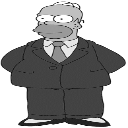

homer 0


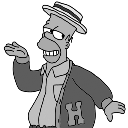

homer 0


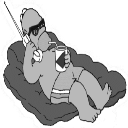

homer 0


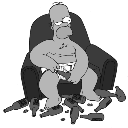

homer 0


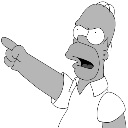

homer 0


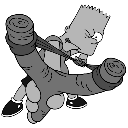

bart 1


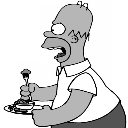

homer 0


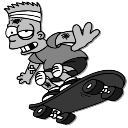

bart 1


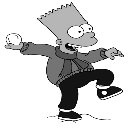

bart 1


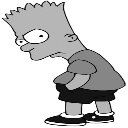

bart 1


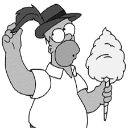

homer 0


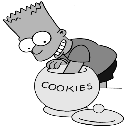

bart 1


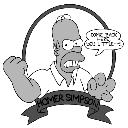

homer 0


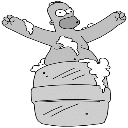

homer 0


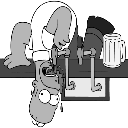

homer 0


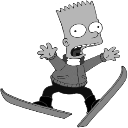

bart 1


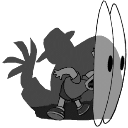

bart 1


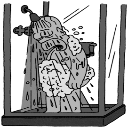

homer 0


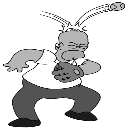

homer 0


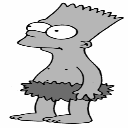

bart 1


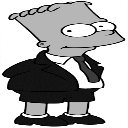

bart 1


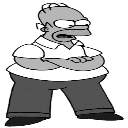

homer 0


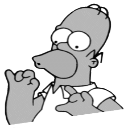

homer 0


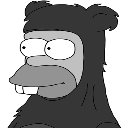

homer 0


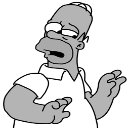

homer 0


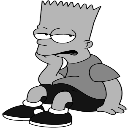

bart 1


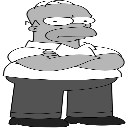

homer 0


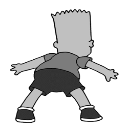

bart 1


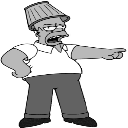

homer 0


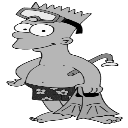

bart 1


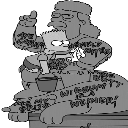

bart 1


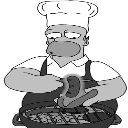

homer 0


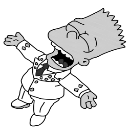

bart 1


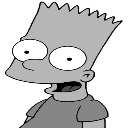

bart 1


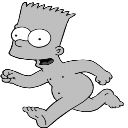

bart 1


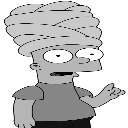

bart 1


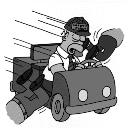

homer 0


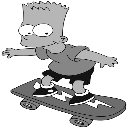

bart 1


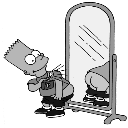

bart 1


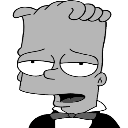

bart 1


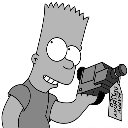

bart 1


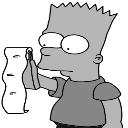

bart 1


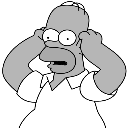

homer 0


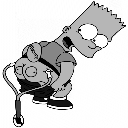

bart 1


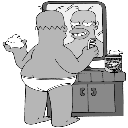

homer 0


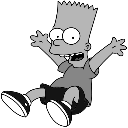

bart 1


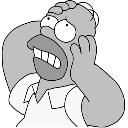

homer 0


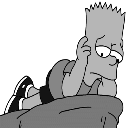

bart 1


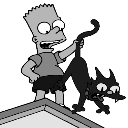

bart 1


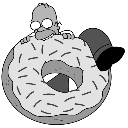

homer 0


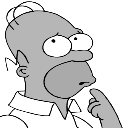

homer 0


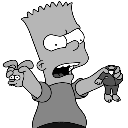

bart 1


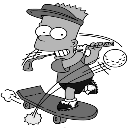

bart 1


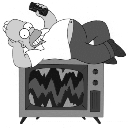

homer 0


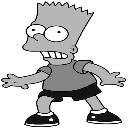

bart 1


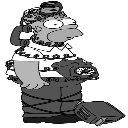

homer 0


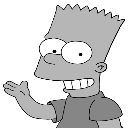

bart 1


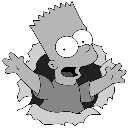

bart 1


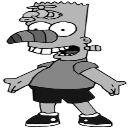

bart 1


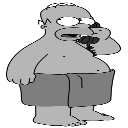

homer 0


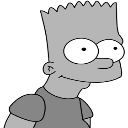

bart 1


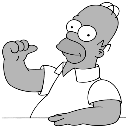

homer 0


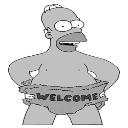

homer 0


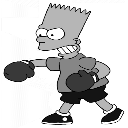

bart 1


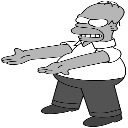

homer 0


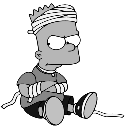

bart 1


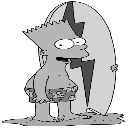

bart 1


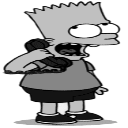

bart 1


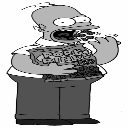

homer 0


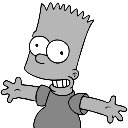

bart 1


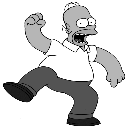

homer 0


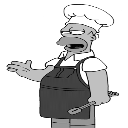

homer 0


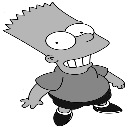

bart 1


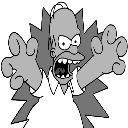

homer 0


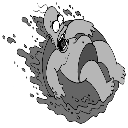

homer 0


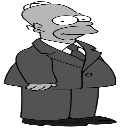

homer 0


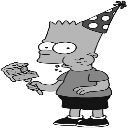

bart 1


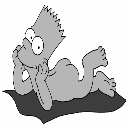

bart 1


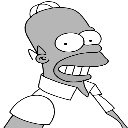

homer 0


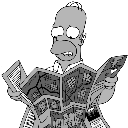

homer 0


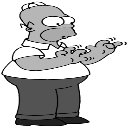

homer 0


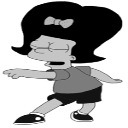

bart 1


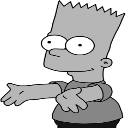

bart 1


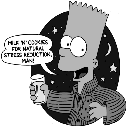

bart 1


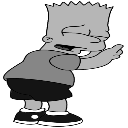

bart 1


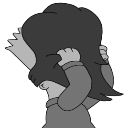

bart 1


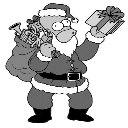

homer 0


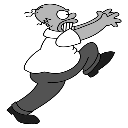

homer 0


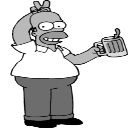

homer 0


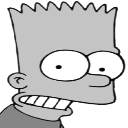

bart 1


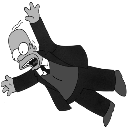

homer 0


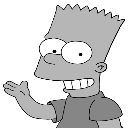

bart 1


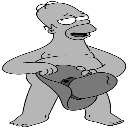

homer 0


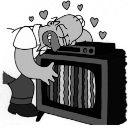

homer 0


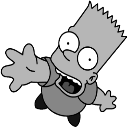

bart 1


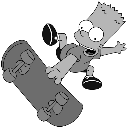

bart 1


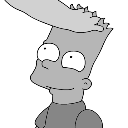

bart 1


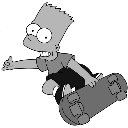

bart 1


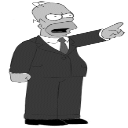

homer 0


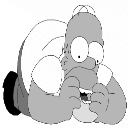

homer 0


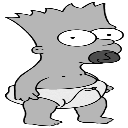

bart 1


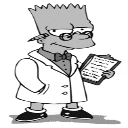

bart 1


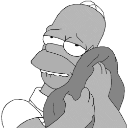

homer 0


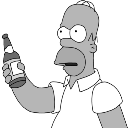

homer 0


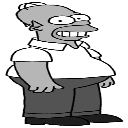

homer 0


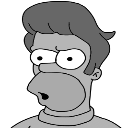

homer 0


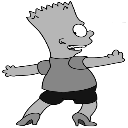

bart 1


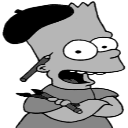

bart 1


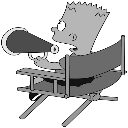

bart 1


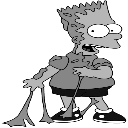

bart 1


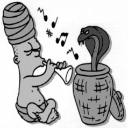

bart 1


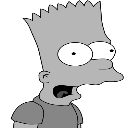

bart 1


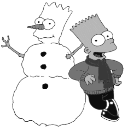

bart 1


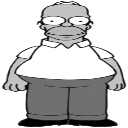

homer 0


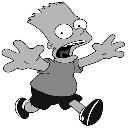

bart 1


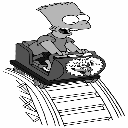

bart 1


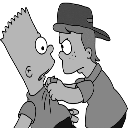

bart 1


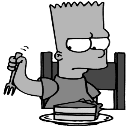

bart 1


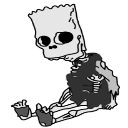

bart 1


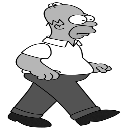

homer 0


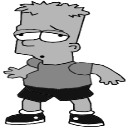

bart 1


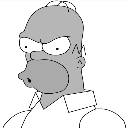

homer 0


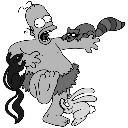

homer 0


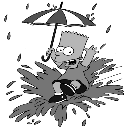

bart 1


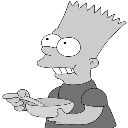

bart 1


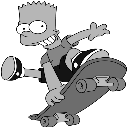

bart 1


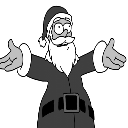

homer 0


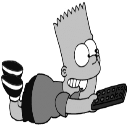

bart 1


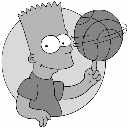

bart 1


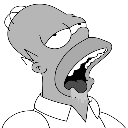

homer 0


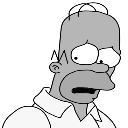

homer 0


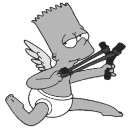

bart 1


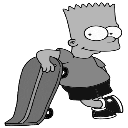

bart 1


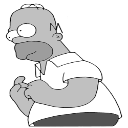

homer 0


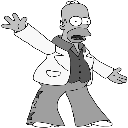

homer 0


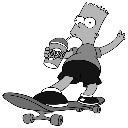

bart 1


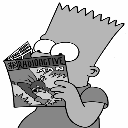

bart 1


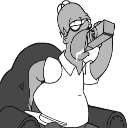

homer 0


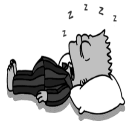

bart 1


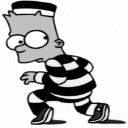

bart 1


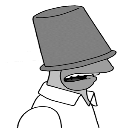

homer 0


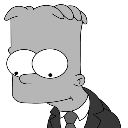

bart 1


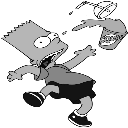

bart 1


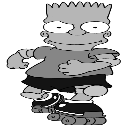

bart 1


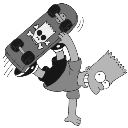

bart 1


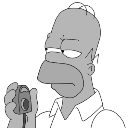

homer 0


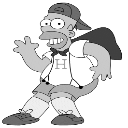

homer 0


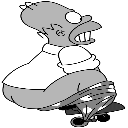

homer 0


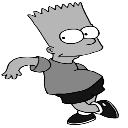

bart 1


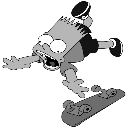

bart 1


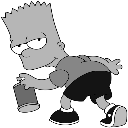

bart 1


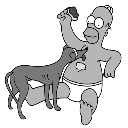

homer 0


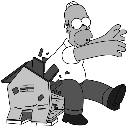

homer 0


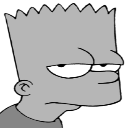

bart 1


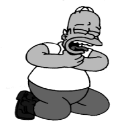

homer 0


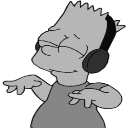

bart 1


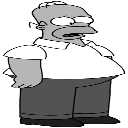

homer 0


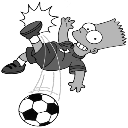

bart 1


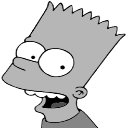

bart 1


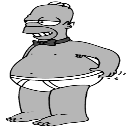

homer 0


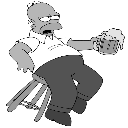

homer 0


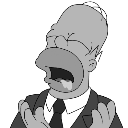

homer 0


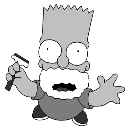

bart 1


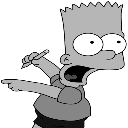

bart 1


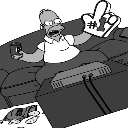

homer 0


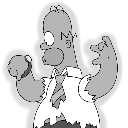

homer 0


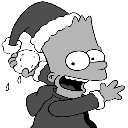

bart 1


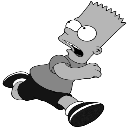

bart 1


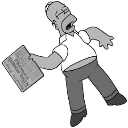

homer 0


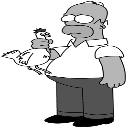

homer 0


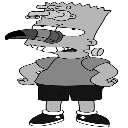

bart 1


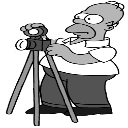

homer 0


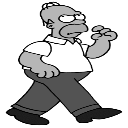

homer 0


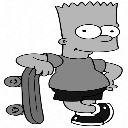

bart 1


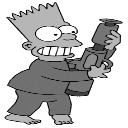

bart 1


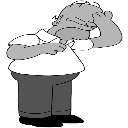

homer 0


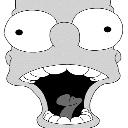

bart 1


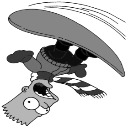

bart 1


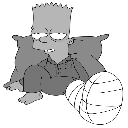

bart 1


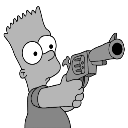

bart 1


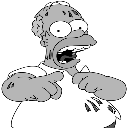

homer 0


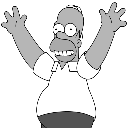

homer 0


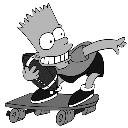

bart 1


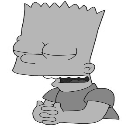

bart 1


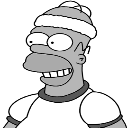

homer 0


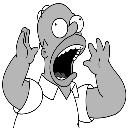

homer 0


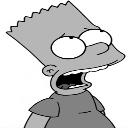

bart 1


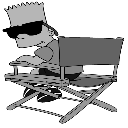

bart 1


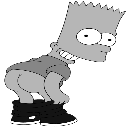

bart 1


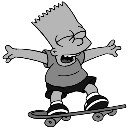

bart 1


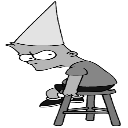

bart 1


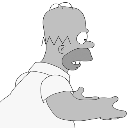

homer 0


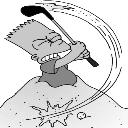

bart 1


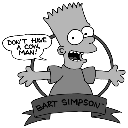

bart 1


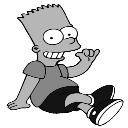

bart 1


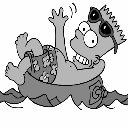

bart 1


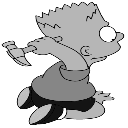

bart 1


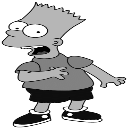

bart 1


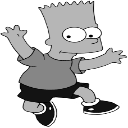

bart 1


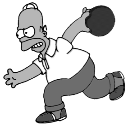

homer 0


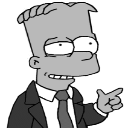

bart 1


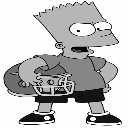

bart 1


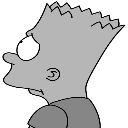

bart 1


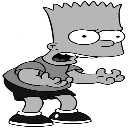

bart 1


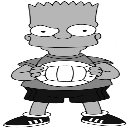

bart 1


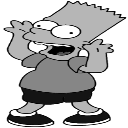

bart 1


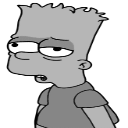

bart 1


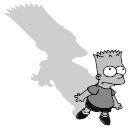

bart 1


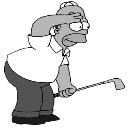

homer 0


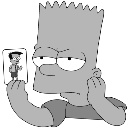

bart 1


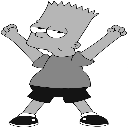

bart 1


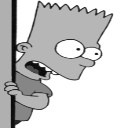

bart 1


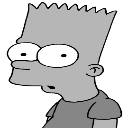

bart 1


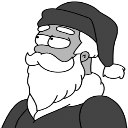

homer 0


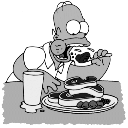

homer 0


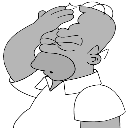

homer 0


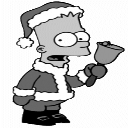

bart 1


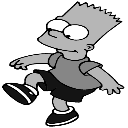

bart 1


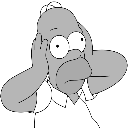

homer 0


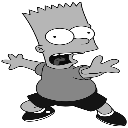

bart 1


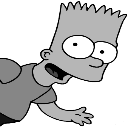

bart 1


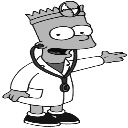

bart 1


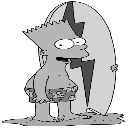

bart 1


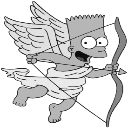

bart 1


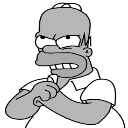

homer 0


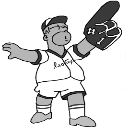

homer 0


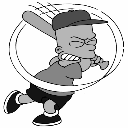

bart 1


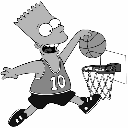

bart 1


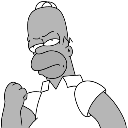

homer 0


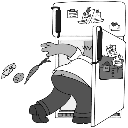

homer 0


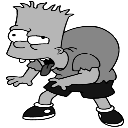

bart 1


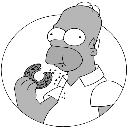

homer 0


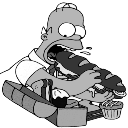

homer 0


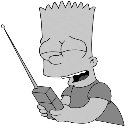

bart 1


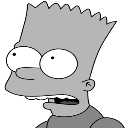

bart 1


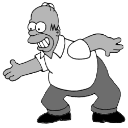

homer 0


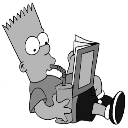

bart 1


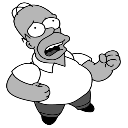

homer 0


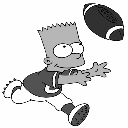

bart 1


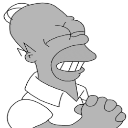

homer 0


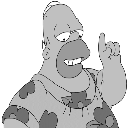

homer 0


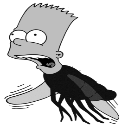

bart 1


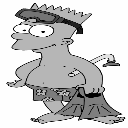

bart 1


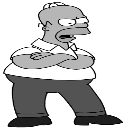

homer 0


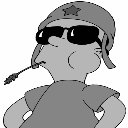

bart 1


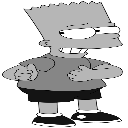

bart 1


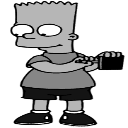

bart 1


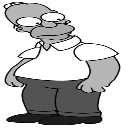

homer 0


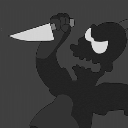

homer 0


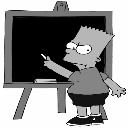

bart 1


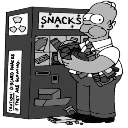

homer 0


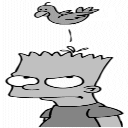

bart 1


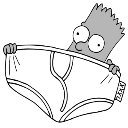

bart 1


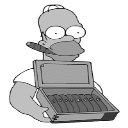

homer 0


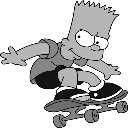

bart 1


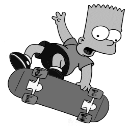

bart 1


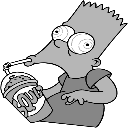

bart 1


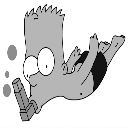

bart 1


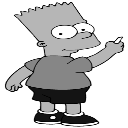

bart 1


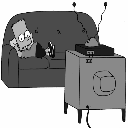

bart 1


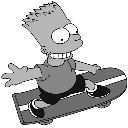

bart 1


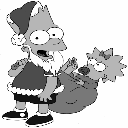

bart 1


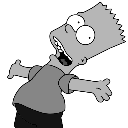

bart 1


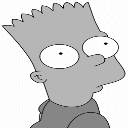

bart 1


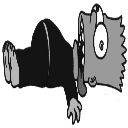

bart 1


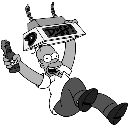

homer 0


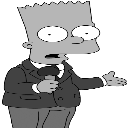

bart 1


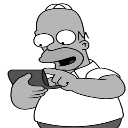

homer 0


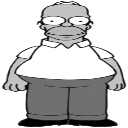

homer 0


In [6]:
altura, largura = 128, 128
altura * largura
imagens = []
classes = []


for arquivo in arquivos:
  try:
    imagem = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (altura, largura))
  except:
    continue

  cv2_imshow(imagem)
  person_name = arquivo.split('/')[-1].split('.')[0]
  person_name = [s for s in person_name if s.isalpha()]
  person_name = ''.join(person_name)
  imagem = imagem.ravel() #transforma a matriz dos pixels em apenas um vetor, para inputar na rede neural

  person_class = 1
  for clazz in person_classes:
    if clazz[0] == person_name:
      person_class = clazz[1]

  classes.append(person_class)
  imagens.append(imagem)

  print(person_name, person_class)


In [7]:
X = np.asarray(imagens)
y = np.asarray(classes)

#sns.countplot(x=y)
total_per_person = np.unique(y, return_counts=True)
homer_count, bart_count = total_per_person[1][0], total_per_person[1][1]

# **TRATANDO DADOS E CRIANDO O MODELO**

TRANSFORMA OS VALORES DOS PIXELS DE 255 PARA UM RANGE DE 0 A 1, PARA MELHORAR O PROCESSAMENTO


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.min(), X_scaled.max())

0.0 1.0000000000000002


In [9]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X_scaled, y, test_size=0.2, random_state= 1) #garante que os tests e treino serão feitos com os mesmos registros (já separados para test e treino)
x_treino.shape, y_treino.shape
x_teste.shape, y_teste.shape



((54, 16384), (54,))

In [10]:
qtde_total_pixels = int(x_treino.shape[1])
unidades_neuronios = int((qtde_total_pixels + len(person_classes)) / len(person_classes))

network1 = tf.keras.models.Sequential()

network1.add(tf.keras.layers.Input(shape=(qtde_total_pixels,)))
network1.add(tf.keras.layers.Dense(units=unidades_neuronios, activation='relu'))
network1.add(tf.keras.layers.Dense(units=unidades_neuronios, activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

network1.summary()

#optimizer=adam pq é o padrão para esse tipo de problema simples de 2 classes
#loss function = binary_crossentropy utilizado para calcular erro em modelos de classes binária (esse caso)
network1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = network1.fit(x_treino, y_treino, epochs=100)






Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 370ms/step - accuracy: 0.4547 - loss: 173.1944
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5523 - loss: 10.6907
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4802 - loss: 4.2092
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4845 - loss: 6.0293
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5415 - loss: 6.5612
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5896 - loss: 2.5601
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4303 - loss: 2.4121
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5760 - loss: 1.8252
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5838 - loss: 2.1205
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6089 - loss: 0.8791
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6537 - loss: 0.6488
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6096 

# **TESTANDO E METRIFICANDO O MODELO**
AGORA USANDO A PARTE DA BASE DE DADOS PARA TESTS




In [66]:
history.history # histórico das 50 epochs

predict1 = network1.predict(x_teste)
# 1 = True (homer)
predict1 = (predict1 > 0.5).astype(bool) # > 0.5 = homer else = bart
x_teste.shape



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


(54, 16384)

accurancy: 0.7592592592592593
confusion matrix: [[17  9]
 [ 4 24]]


<Axes: >

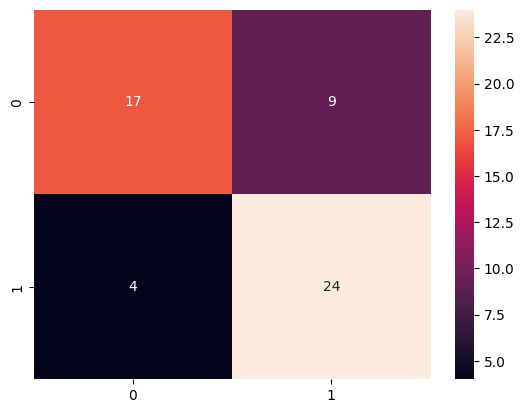

In [12]:
from sklearn.metrics import accuracy_score
accurancy = accuracy_score(predict1, y_teste)
cm = tf.math.confusion_matrix(labels=y_teste, predictions=predict1)
print(f"accurancy: {accurancy}")
print(f"confusion matrix: {cm}")
sns.heatmap(cm, annot=True)




In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, predict1)) #recall = quanto de cada classe ele conseguiu identificar, e precision a precisão dessa identificacao do recall

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.73      0.86      0.79        28

    accuracy                           0.76        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54



SALVANDO OS DADOS DO TREINAMENTO DO MODELO


In [14]:
model_json = network1.to_json()
with(open('network1.json', 'w') as f):
  f.write(model_json)



SALVA OS PESOS DA REDE NEURAL

In [15]:
from keras.models import save_model
network1.save('network1.keras')

Carregando os arquivos salvos

In [16]:
with(open('network1.json', 'r') as f):
  json_save_model = f.read()

json_save_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null

In [17]:
network1_loaded = tf.keras.models.model_from_json(json_save_model)
network1_loaded.load_weights('network1.keras')
network1_loaded.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )


In [18]:
network1_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

IMPORTANDO O TREINAMENTO E O PESO DE UM .KERAS (MAIS RECOMENDADO)

In [19]:
import tensorflow as tf
network1_loaded_from_keras = tf.keras.models.load_model('network1.keras')
network1_loaded_from_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
network1_loaded_from_keras.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

CLASSIFICAÇÃO DE UNICA IMG
  

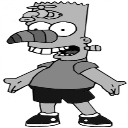

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
bart


In [84]:
img_index = 7
img1 = x_teste[img_index]
img1 = scaler.inverse_transform(img1.reshape(1, -1))
cv2_imshow(img1.reshape(128, 128))
predict = network1.predict(img1)[0][0]
int_class = np.round(predict)
for p in person_classes:
  if p[1] == int_class:
    print(p[0])


# **EXTRAÇÃO DE CARACTERÍSITCAS DA IMAGEM**

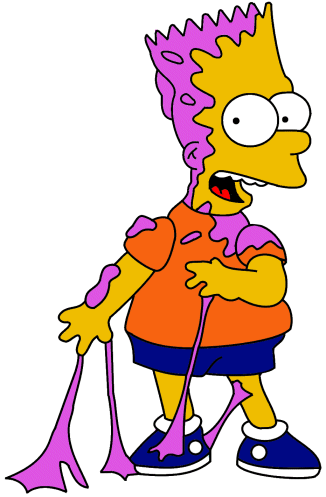

497 326


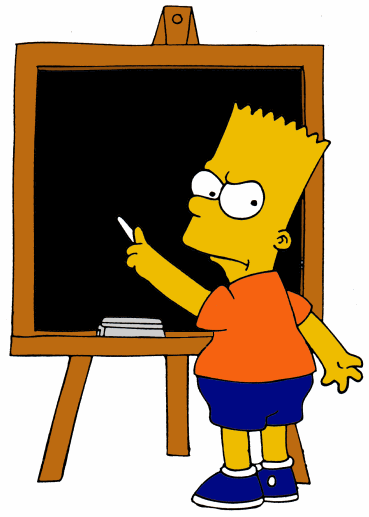

517 369


In [89]:
arquivos = [os.path.join(root_path, f) for f in sorted(os.listdir(root_path))]
export = 'boca, calca, sapatos, camisa, calcao, tenis, classe\n'
mostrar_img  = False
caracteristicas = []

for arqv in arquivos[:3]:
  try:
    img_original = cv2.imread(arqv)
    (H, W) = img_original.shape[:2]
  except:
    continue

  img_alterada = img_original.copy()
  img_caracteristicas = []
  img_nome =  os.path.basename(os.path.normpath(arqv))
  if img_nome.startswith('h'):
    classe = 0
  else:
    classe = 1





In [ ]:
W